**Importando as variáveis de ambiente**



In [ ]:
import pandas as pd
import numpy as np

**Montando o drive virtual**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Carregando os dados**

In [ ]:
path_matheus = '/content/drive/MyDrive/ANÁLISE E DESENVOLVIMENTO DE SISTEMAS/4⁰ Período /Bid-Data/Trabalho DATA-TOWN/trabalho_final/database/arquivo_tratado/arquivo_concatenado_covid.csv'
df_1 = pd.read_csv(path_matheus)

**Visualisando os dados do arquivo**

In [ ]:
df_1.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


-  Vendo os valores Nulos

In [ ]:
df_1.isna().sum()

regiao                          0
estado                       1313
municipio                   63686
coduf                           0
codmun                      36764
codRegiaoSaude              63686
nomeRegiaoSaude             63686
data                            0
semanaEpi                       0
populacaoTCU2019            26922
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          7203114
emAcompanhamentoNovos     7203114
interior/metropolitana      63686
dtype: int64

- Entendendo se há outros padrões para valores nulos

In [ ]:
df_1 = df_1.replace({'?': np.nan, '-': np.nan, ' ': np.nan, ';': np.nan, ',': np.nan, '.': np.nan})
df_1.isna().sum()

regiao                          0
estado                       1313
municipio                   63686
coduf                           0
codmun                      36764
codRegiaoSaude              63686
nomeRegiaoSaude             63686
data                            0
semanaEpi                       0
populacaoTCU2019            26922
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          7203114
emAcompanhamentoNovos     7203114
interior/metropolitana      63686
dtype: int64

- Entendendo dados filtrados por 'municipio' que não são nulos

In [ ]:
municipios = (df_1['municipio'].notna())
df_municipio = df_1[municipios]
df_municipio.shape

(7140740, 17)

In [ ]:
df_municipio.isna().sum()

regiao                          0
estado                          0
municipio                       0
coduf                           0
codmun                          0
codRegiaoSaude                  0
nomeRegiaoSaude                 0
data                            0
semanaEpi                       0
populacaoTCU2019                0
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          7140740
emAcompanhamentoNovos     7140740
interior/metropolitana          0
dtype: int64

- Removendo colunas df_1

In [ ]:
del df_municipio['emAcompanhamentoNovos']
del df_municipio['Recuperadosnovos']


df_municipio.isna().sum()

regiao                    0
estado                    0
municipio                 0
coduf                     0
codmun                    0
codRegiaoSaude            0
nomeRegiaoSaude           0
data                      0
semanaEpi                 0
populacaoTCU2019          0
casosAcumulado            0
casosNovos                0
obitosAcumulado           0
obitosNovos               0
interior/metropolitana    0
dtype: int64

- Checando resultados

In [ ]:
df_municipio

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana
4551,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-27,13,22945.0,0.0,0,0,0,0.0
4552,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-28,13,22945.0,0.0,0,0,0,0.0
4553,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-29,14,22945.0,0.0,0,0,0,0.0
4554,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-30,14,22945.0,0.0,0,0,0,0.0
4555,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-31,14,22945.0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204421,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-25,39,3015268.0,916276.0,0,11896,0,1.0
7204422,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-26,39,3015268.0,916276.0,0,11896,0,1.0
7204423,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-27,39,3015268.0,916276.0,0,11896,0,1.0
7204424,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-28,39,3015268.0,916276.0,0,11896,0,1.0


**Resetando índices**

In [ ]:
df_municipio.reset_index(drop=True, inplace=True)
df_municipio

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana
0,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-27,13,22945.0,0.0,0,0,0,0.0
1,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-28,13,22945.0,0.0,0,0,0,0.0
2,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-29,14,22945.0,0.0,0,0,0,0.0
3,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-30,14,22945.0,0.0,0,0,0,0.0
4,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-31,14,22945.0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140735,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-25,39,3015268.0,916276.0,0,11896,0,1.0
7140736,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-26,39,3015268.0,916276.0,0,11896,0,1.0
7140737,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-27,39,3015268.0,916276.0,0,11896,0,1.0
7140738,Centro-Oeste,DF,BrasÃ­lia,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-28,39,3015268.0,916276.0,0,11896,0,1.0


In [ ]:
df_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140740 entries, 0 to 7140739
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          float64
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  interior/metropolitana  float64
dtypes: float64(5), int64(5), object(5)
memory usage: 817.2+ MB


In [ ]:
df_municipio.shape

(7140740, 15)

In [ ]:
df_municipio.nunique()

regiao                        5
estado                       27
municipio                  5297
coduf                        27
codmun                     5570
codRegiaoSaude              450
nomeRegiaoSaude             440
data                       1282
semanaEpi                    53
populacaoTCU2019           5077
casosAcumulado            84427
casosNovos                 3857
obitosAcumulado            9567
obitosNovos                 557
interior/metropolitana        2
dtype: int64

- Checando dados

In [ ]:
df_municipio.municipio.value_counts()

Bom Jesus                  6410
SÃ£o Domingos              6410
Bonito                     5128
Santa Helena               5128
Santa Terezinha            5128
                           ... 
ConceiÃ§Ã£o do JacuÃ­pe    1282
ConceiÃ§Ã£o do CoitÃ©      1282
ConceiÃ§Ã£o do Almeida     1282
ConceiÃ§Ã£o da Feira       1282
BrasÃ­lia                  1282
Name: municipio, Length: 5297, dtype: int64

In [ ]:
dados_bom_jesus = (df_municipio['municipio'] == 'Bom Jesus')
df_municipio[dados_bom_jesus]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana
88519,Nordeste,PI,Bom Jesus,22,220190.0,22002.0,CHAPADA DAS MANGABEIRAS,2020-03-27,13,25179.0,0.0,0,0,0,0.0
88520,Nordeste,PI,Bom Jesus,22,220190.0,22002.0,CHAPADA DAS MANGABEIRAS,2020-03-28,13,25179.0,0.0,0,0,0,0.0
88521,Nordeste,PI,Bom Jesus,22,220190.0,22002.0,CHAPADA DAS MANGABEIRAS,2020-03-29,14,25179.0,0.0,0,0,0,0.0
88522,Nordeste,PI,Bom Jesus,22,220190.0,22002.0,CHAPADA DAS MANGABEIRAS,2020-03-30,14,25179.0,0.0,0,0,0,0.0
88523,Nordeste,PI,Bom Jesus,22,220190.0,22002.0,CHAPADA DAS MANGABEIRAS,2020-03-31,14,25179.0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057470,Sul,RS,Bom Jesus,43,430230.0,43024.0,REGIAO 24,2023-09-25,39,11349.0,2073.0,0,31,0,0.0
7057471,Sul,RS,Bom Jesus,43,430230.0,43024.0,REGIAO 24,2023-09-26,39,11349.0,2073.0,0,31,0,0.0
7057472,Sul,RS,Bom Jesus,43,430230.0,43024.0,REGIAO 24,2023-09-27,39,11349.0,2073.0,0,31,0,0.0
7057473,Sul,RS,Bom Jesus,43,430230.0,43024.0,REGIAO 24,2023-09-28,39,11349.0,2073.0,0,31,0,0.0


In [ ]:
dados_bom_jesus = (df_municipio['municipio'] == 'Bom Jesus')
dados_bom_jesus_estado = df_municipio[dados_bom_jesus]

dados_bom_jesus_estado['estado'].value_counts()

PI    1282
RN    1282
PB    1282
SC    1282
RS    1282
Name: estado, dtype: int64

- Analisando mais informações

In [ ]:
df_municipio['obitosNovos'].sum()

704857

In [ ]:
df_municipio['obitosAcumulado'].max()

45319

- Descobrindo o periodo da análise

In [ ]:
inicio = pd.to_datetime(df_municipio['data']).dt.date.min()
fim = pd.to_datetime(df_municipio['data']).dt.date.max()
print(inicio)
print(fim)

2020-03-27
2023-09-29


- Modificando o formato da coluna 'data'

In [ ]:
df_1['data'] = pd.to_datetime(df_1['data'])

df_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140740 entries, 0 to 7140739
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   regiao                  object        
 1   estado                  object        
 2   municipio               object        
 3   coduf                   int64         
 4   codmun                  float64       
 5   codRegiaoSaude          float64       
 6   nomeRegiaoSaude         object        
 7   data                    datetime64[ns]
 8   semanaEpi               int64         
 9   populacaoTCU2019        float64       
 10  casosAcumulado          float64       
 11  casosNovos              int64         
 12  obitosAcumulado         int64         
 13  obitosNovos             int64         
 14  interior/metropolitana  float64       
dtypes: datetime64[ns](1), float64(5), int64(5), object(4)
memory usage: 817.2+ MB


**Salvando no arquivo**

In [ ]:
path_matheus_tratado = '/content/drive/MyDrive/ANÁLISE E DESENVOLVIMENTO DE SISTEMAS/4⁰ Período /Bid-Data/Trabalho DATA-TOWN/trabalho_final/database/PRINCIPAL/municipios.csv'
df_municipio.to_csv(path_matheus_tratado, index=False)

- Entendendo correlações

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-21-197b48c11122>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1[colunas].corr(), vmax= 1., square = True)


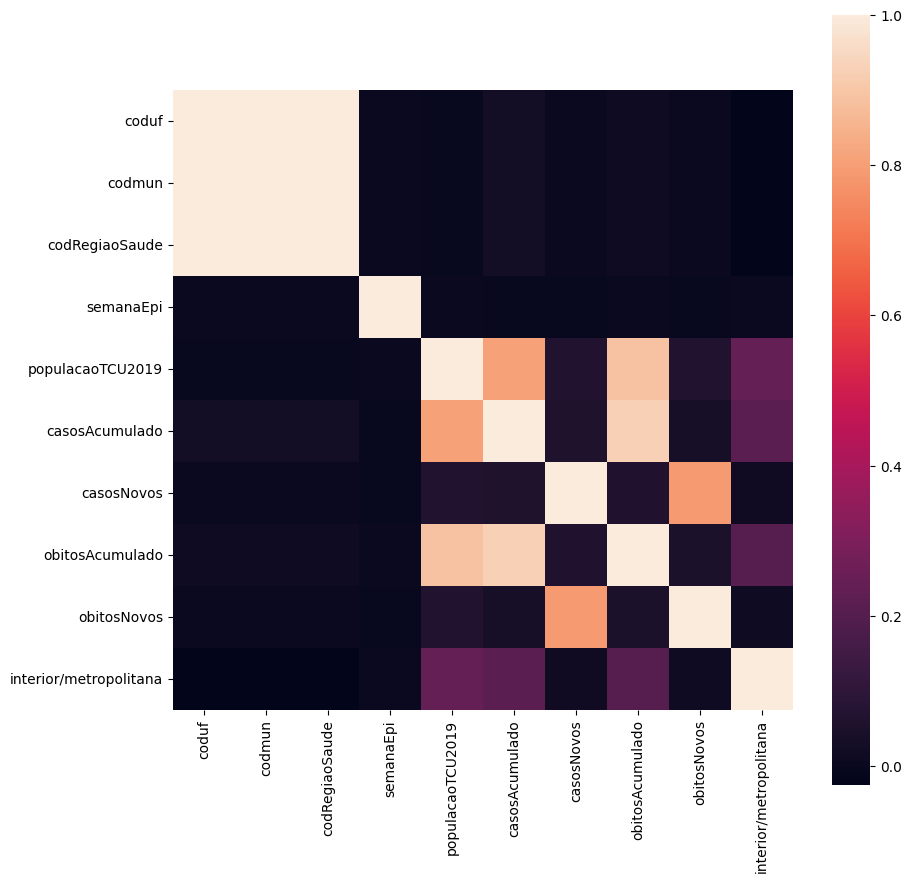

In [ ]:
plt.figure(figsize = (10, 10))

colunas = [	'regiao',	'estado',	'municipio',	'coduf',	'codmun',	'codRegiaoSaude',	'nomeRegiaoSaude',	'data',	'semanaEpi',	'populacaoTCU2019',	'casosAcumulado',	'casosNovos',	'obitosAcumulado',	'obitosNovos', 'interior/metropolitana'	]

sns.heatmap(df_municipio[colunas].corr(), vmax= 1., square = True)

plt.show()